In [2]:
# read file
fn = "repId_isDark_nMem.tsv"
f = open(f'../summary/{fn}', 'r')

bright_nMem_hit = {}
dark_nMem_hit = {}

while True:
  line = f.readline().strip()

  if not line:
    break

  [repId, isDark, nMem] = line.split('\t')
  isDark = int(isDark)
  nMem = int(nMem)

  if isDark == 1:
    if dark_nMem_hit.get(nMem):
      dark_nMem_hit[nMem] += 1
    else:
      dark_nMem_hit[nMem] = 1
  else:
    if bright_nMem_hit.get(nMem):
      bright_nMem_hit[nMem] += 1
    else:
      bright_nMem_hit[nMem] = 1

f.close()

In [23]:
# dictionary to array
max_nMem = max(list(bright_nMem_hit.keys()) + list(dark_nMem_hit.keys())) 
bright_hist_nMem = [ bright_nMem_hit[i] if bright_nMem_hit.get(i) else 0 for i in range(max_nMem+1)]
dark_hist_nMem = [ dark_nMem_hit[i] if dark_nMem_hit.get(i) else 0 for i in range(max_nMem+1)]

In [59]:
# arrange histogram - set variables
delimiters = [4, 10, 20, 40, 80, 160, 320, 700, 1800, 38901]
delimiters_starting_point = [2] + delimiters
Xs = [f"{delimiters_starting_point[i-1]}~{delimiters_starting_point[i]}" for i in range(1, len(delimiters_starting_point)) ]
num_bins = len(delimiters)

num_member_AFDB_Clusters = 0

dark_bins = [0] * num_bins
bright_bins = [0] * num_bins
occupations_per_bins = [0] * num_bins

dark_rate_bins = [0] * num_bins
bright_rate_bins = [0] * num_bins

In [60]:
# histogram into 10 bins
bin_i = 0
nMem_i = 2

for bin_i in range(len(delimiters)):
    bin_nMem_upper_bound = delimiters[bin_i]

    # traverse hist array
    while True:
        if nMem_i > max_nMem:
            break
        
        dark_bins[bin_i] += dark_hist_nMem[nMem_i]
        bright_bins[bin_i] += bright_hist_nMem[nMem_i]

        occupations_per_bins[bin_i] += ( dark_hist_nMem[nMem_i] + bright_hist_nMem[nMem_i] ) * nMem_i
        num_member_AFDB_Clusters += ( dark_hist_nMem[nMem_i] + bright_hist_nMem[nMem_i] ) * nMem_i

        nMem_i += 1

        if nMem_i > bin_nMem_upper_bound:
            break

In [61]:
# find occupations
for i in range(num_bins):
    occupations_per_bins[i] = occupations_per_bins[i] / num_member_AFDB_Clusters * 100

for e in occupations_per_bins:
    print("{:.2f}%".format(e), end=", ")

12.24%, 10.59%, 9.20%, 10.07%, 10.46%, 10.05%, 9.04%, 9.20%, 9.19%, 9.96%, 

In [63]:
# generate ratio per bin
for i in range(num_bins):
    denominator = bright_bins[i] + dark_bins[i]

    bright_rate_bins[i] = bright_bins[i] / denominator * 100
    dark_rate_bins[i] = dark_bins[i] / denominator * 100

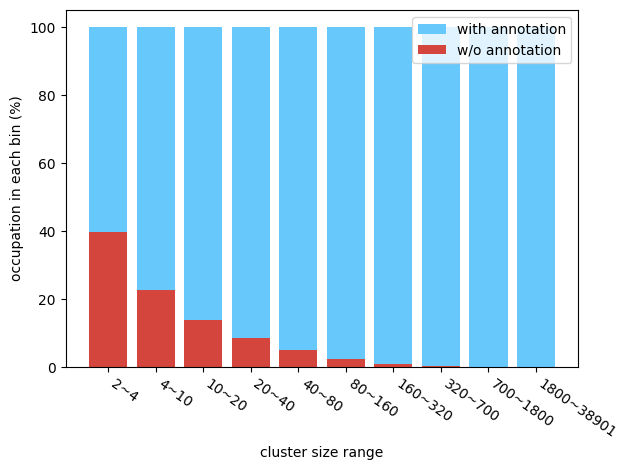

In [65]:
import matplotlib.pyplot as plt

colors = ['#d4453d', '#67c8fb', '#67c8fb']
labels = ['w/o annotation',
         'with annotation',
         'sequences without annotation in (1)',]

plt.bar(Xs, bright_rate_bins, bottom=dark_rate_bins, color=colors[2],  label=labels[1])
plt.bar(Xs, dark_rate_bins, color=colors[0],  label=labels[0])
plt.xticks(Xs, rotation=-35, ha='left')
plt.xlabel("cluster size range")
plt.ylabel("occupation in each bin (%)")
plt.legend()

plt.tight_layout()
plt.savefig('darks.svg')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# set variables
label_bars = ['removed (fragments, singletons)', 'w/o annotation', 'with annotation']
colors = ['#b6b6b6', '#d4453d', '#67c8fb']
Xs = ['AFDB\n214M', 'AFDB clusters\n2.27M']
Ys_top = np.arange(len(Xs))

afdb_r_d_b = [0, 0, 0] # removed, dark, bright
afdb_clusters_r_d_b = [0, 0, 0]

In [6]:
fn_afdb = 'AFDB-removed_dark_bright.tsv'
f_afdb = open(f"../summary/{fn_afdb}")

afdb_r_d_b = list(map(int, f_afdb.readline().strip().split()))

f_afdb.close()

fn_afdb_clusters = 'AFDB-Clusters-removed_dark-bright.tsv'
f_afdb_clusters = open(f'../summary/{fn_afdb_clusters}')

afdb_clusters_r_d_b = list(map(int, f_afdb_clusters.readline().strip().split()))

f_afdb_clusters.close()

In [7]:
# generate ratio
layers = np.array([afdb_r_d_b, afdb_clusters_r_d_b]).T
denominators = np.sum(layers, axis=0)
layers = layers / denominators * 100

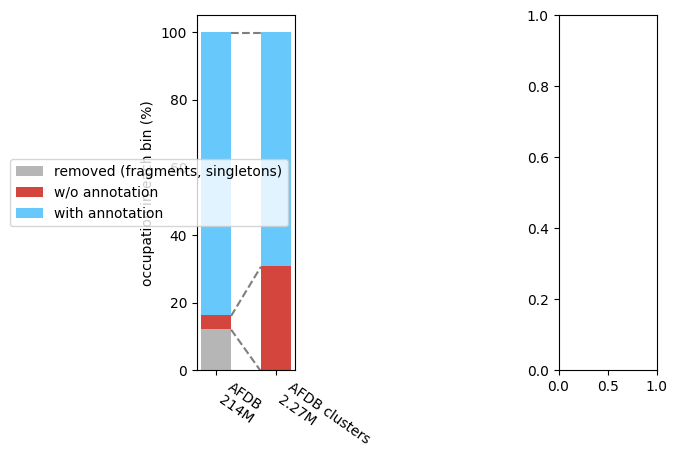

In [11]:

fig = plt.figure()
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 0:1])

w = 0.5
bottoms = np.zeros(len(Ys_top))
[I, J] = layers.shape

for i in range(len(layers)):
    ax2.bar(Ys_top, layers[i], w, bottom=bottoms, color=colors[i], label=label_bars[i])
    bottoms = bottoms + layers[i]

    for j in range(J-1):
        ax2.plot([Ys_top[j] + w/2, Ys_top[j+1] - w/2],
                [bottoms[j]-0.3, bottoms[j+1]-0.3],\
                color='C7', ls='--', zorder=1)

ax2.set_xticks(Ys_top, Xs, rotation=-35, ha='left')
ax2.set_ylabel('occupation in each bin (%)')
ax2.set_ylim([0, 105])
# ax2.legend()

plt.legend()
plt.tight_layout()
plt.savefig('two_bars2.svg')
# plt.show()